<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/SIHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
%matplotlib inline


In [2]:
def deriv(y, t, lamb, beta, delta, epsilon, eta, alpha, k):
    S, I, H, R = y
    dIdt = -(lamb+beta)*k*I*S
    dSdt = (lamb*k*I*S)-((alpha*k*S)*(S+H+R))-(delta*S)+(epsilon*H)+(eta*k*H*S)
    dHdt = (delta*S)-(epsilon*H)-(eta*k*H*S)
    dRdt = (beta*k*I*S)+((alpha*k*S)*(S+H+R))
    return [dSdt, dIdt, dHdt, dRdt]


In [3]:
# general trends of the four kinds of agents in the SIHR rumor spreading model

lamb = 0.8
beta = 0.2
delta = 0.6
epsilon = 0.5
eta = 0.5
alpha = 0.3
k = 10

N = 1000000

# initial conditions: one infected, rest susceptible
S0, I0, H0, R0 = 1/N, (N - 1)/N, 0, 0


In [4]:
t = np.linspace(0, 8, 1000)  # Grid of time points (in days)
y0 = S0, I0, H0, R0  # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(lamb, beta, delta, epsilon, eta, alpha, k))
S, I, H, R = ret.T


In [5]:
def plotsir(t, S, I, H, R):
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, 'b',  linewidth=2, label='Spreader', linestyle='-')
    plt.plot(t, I, 'y',  linewidth=2, label='Ignorant', linestyle='-')
    plt.plot(t, H, 'g',  linewidth=2, label='Hibernator', linestyle='-')
    plt.plot(t, R, 'r', linewidth=2, label='Stifler', linestyle='-')

    plt.xlabel('Time ')
    plt.legend()

    plt.grid()
    plt.show()


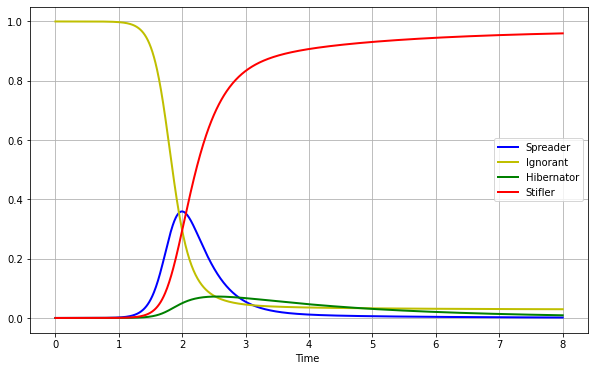

In [6]:
# general trends of the four kinds of agents in the SIHR rumor spreading model
plotsir(t, S, I, H, R)


In [7]:
print('Fraction Susceptible = ', S[-1])
print('Fraction Infective = ', I[-1])
print('Fraction Hibernated = ', H[-1])
print('Fraction Recovered = ', R[-1])


Fraction Susceptible =  0.001601383733758064
Fraction Infective =  0.02950951084740303
Fraction Hibernated =  0.009025494327619704
Fraction Recovered =  0.9598636110912182


# graph

In [8]:
sihr_color = dict()
sihr_color['s'] = 'limegreen'   # susceptible = ignorant
sihr_color['i'] = 'red'         # infected = spreader
sihr_color['h'] = 'blue'        # hibernated
sihr_color['r'] = 'purple'      # recoverd = stifler
sihr_color


{'h': 'blue', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [9]:
N = 5000  # population

# probabilities
lamb = 0.8
beta = 0.2
delta = 0.6
epsilon = 0.5
eta = 0.5
alpha = 0.3

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)


In [10]:
color_map = np.empty(N).astype(str)

color_map[1:] = sihr_color['s']
color_map[0] = sihr_color['i']


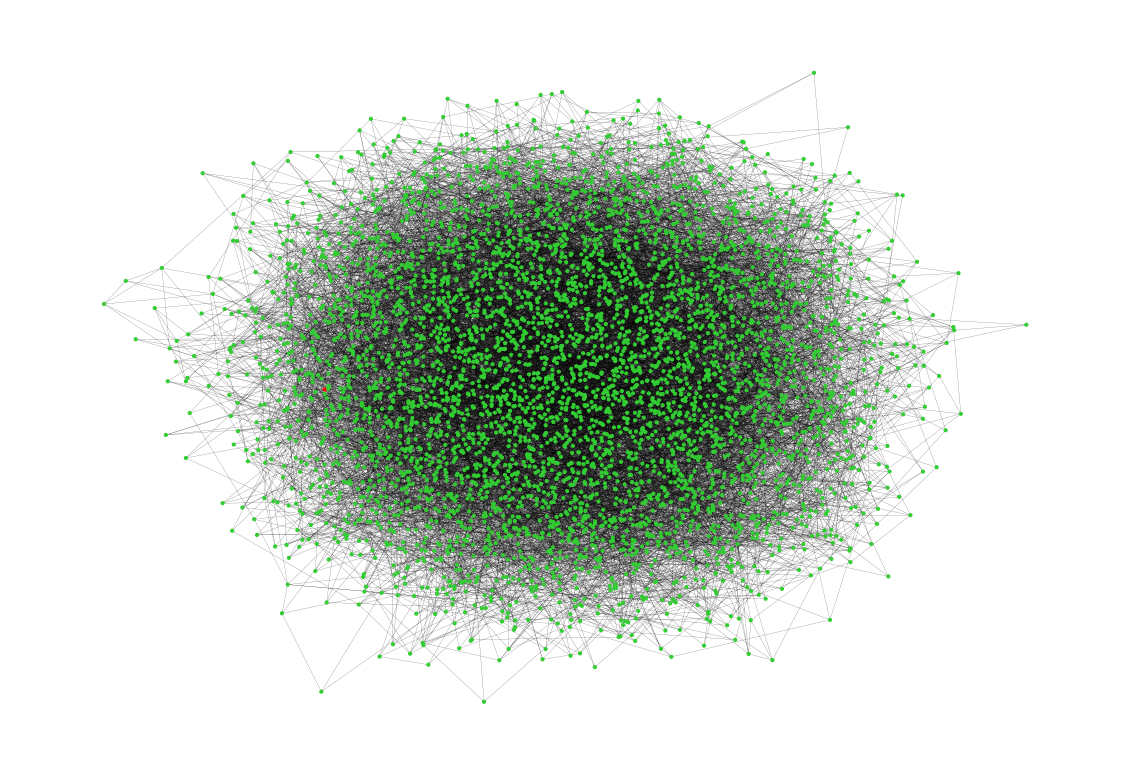

In [11]:
G = nx.connected_watts_strogatz_graph(n=N, k=k, p=0.5, tries=100)

pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10,
                 with_labels=False, width=0.15, node_color=color_map)


In [12]:
for t in range(1, n):
    for i in range(G.number_of_nodes()):
        # forgetting mechanism
        forget = rd.random()
        if color_map[i] == sihr_color['i']:
            if forget < delta:
                color_map[i] = sihr_color['h']
                continue
        # remembering mechanism
        remember = rd.random()
        if color_map[i] == sihr_color['h']:
            if remember < epsilon:
                color_map[i] = sihr_color['i']
                continue
        rand_num = rd.random()
        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sihr_color['s'] and sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < beta:
                color_map[i] = sihr_color['r']
            elif rand_num < lamb:
                color_map[i] = sihr_color['i']
        # if node is infected and at least one neighboring node is infected or hibernated or recovered
        elif color_map[i] == sihr_color['i'] and (sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                  sihr_color['h'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                  sihr_color['r'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
            if rand_num < alpha:
                color_map[i] = sihr_color['r']
        # if node is hibernated and at least one neighboring node is infected
        elif color_map[i] == sihr_color['h'] and sihr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < eta:
                color_map[i] = sihr_color['i']


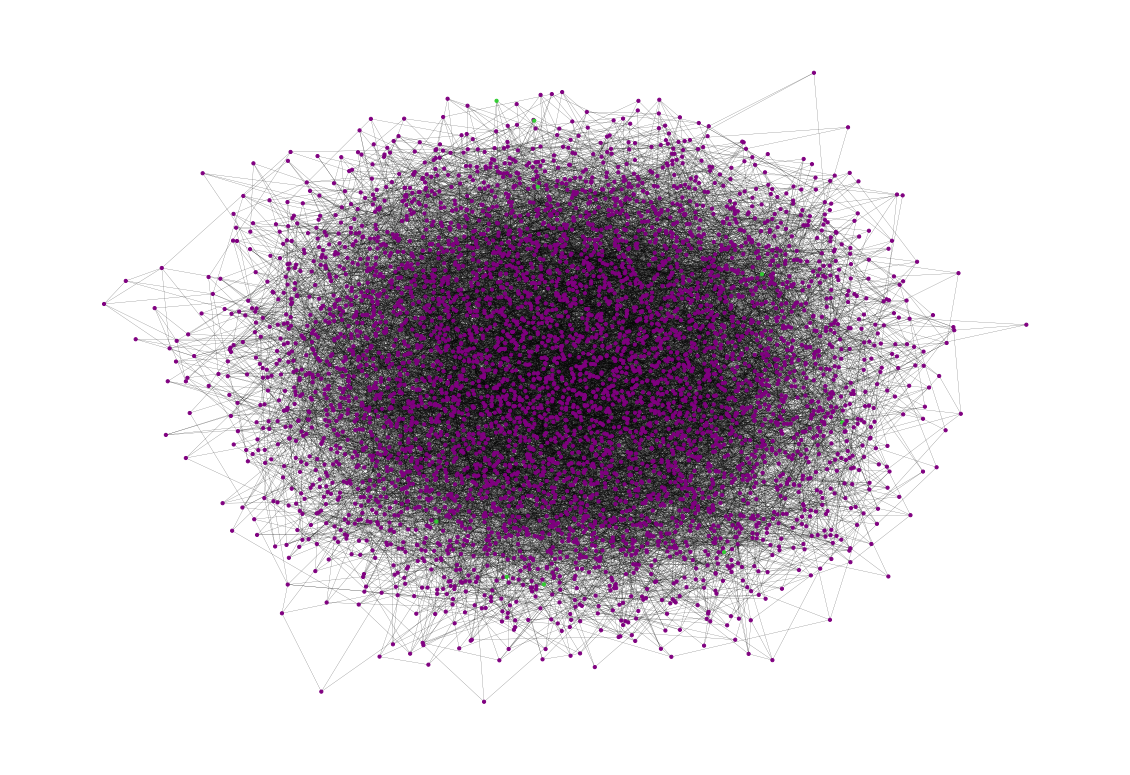

In [13]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10,
                 with_labels=False, width=0.15, node_color=color_map)


In [14]:
num_s = 0
num_i = 0
num_h = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sihr_color['s'] == color_map[i]])
    num_i += sum([sihr_color['i'] == color_map[i]])
    num_h += sum([sihr_color['h'] == color_map[i]])
    num_r += sum([sihr_color['r'] == color_map[i]])

print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Hibernated = ', num_h/N)
print('Fraction Recovered = ', num_r/N)


Fraction Susceptible =  0.0018
Fraction Infective =  0.0
Fraction Hibernated =  0.0
Fraction Recovered =  0.9982


The population is divided into four groups: ignorants, spreaders, hibernators, and stiflers. The SIHR rumor spreading rules can be summarized as follows:
- When an ignorant contacts a spreader, the ignorant becomes a spreader with probability λ, namely spreading rate.
- When an ignorant contacts a spreader, the ignorant becomes a stifler with probability β, namely refusing rate.
- We add the hibernators who come from the spreaders at a rate δ (forgetting rate) to reflect the forgetting mechanism.
- The remembering mechanism also exists for hibernators. Hibernators spontaneously become spreaders at a rate ξ
(spontaneous remembering rate). 
- When a hibernator contacts a spreader, the hibernator becomes a spreader with
probability η, namely wakened remembering rate.
- When a spreader contacts with another spreader or a hibernator or a stifler, only the initiating spreader becomes a stifler
at a probability α, namely stifling rate.

lamb=0.8
beta = 0.2
delta = 0.6
epsilon = 0.5
eta = 0.5
alpha = 0.3

# densities of spreaders change over time for different refusing rate(beta).

In [ ]:
lamb = 0.8
beta = 0
delta = 0.5
epsilon = 0.5
eta = 0.5
alpha = 0.5
k = 10

N = 1000000

# initial conditions: one infected, rest susceptible
S0, I0, H0, R0 = 1/N, (N - 1)/N, 0, 0


In [ ]:
t = np.linspace(0, 5, 1000)  # Grid of time points (in days)
y0 = S0, I0, H0, R0  # Initial conditions vector


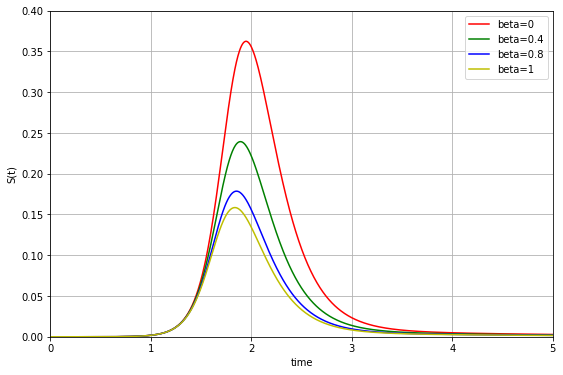

In [ ]:
beta_arr = [0, 0.4, 0.8, 1]

R_table = []
for beta in beta_arr:
    ret = odeint(deriv, y0, t, args=(
        lamb, beta, delta, epsilon, eta, alpha, k))
    S, I, H, R = ret.T
    R_table.append(S)


plt.figure(figsize=[9, 6])
plt.plot(t, R_table[0], c='r', linestyle='-', label='beta=0')
plt.plot(t, R_table[1], c='g', linestyle='-', label='beta=0.4')
plt.plot(t, R_table[2], c='b', linestyle='-', label='beta=0.8')
plt.plot(t, R_table[3], c='y', linestyle='-', label='beta=1')
plt.ylabel('S(t)')
plt.xlabel('time')
plt.legend(loc='upper right')
plt.xlim(0, 5)
plt.ylim(0, .40)
plt.grid()
plt.show()


# densities of spreaders change over time for different forgetting rate δ, the spontaneous remembering rate ξ , and the wakened remembering rate η.

In [ ]:
lamb = 0.8
beta = 0.2
alpha = 0.5

delta = 0
epsilon = 0
eta = 0

k = 10

N = 1000000

# initial conditions: one infected, rest susceptible
S0, I0, H0, R0 = 1/N, (N - 1)/N, 0, 0


In [ ]:
t = np.linspace(0, 5, 1000)  # Grid of time points (in days)
y0 = S0, I0, H0, R0  # Initial conditions vector


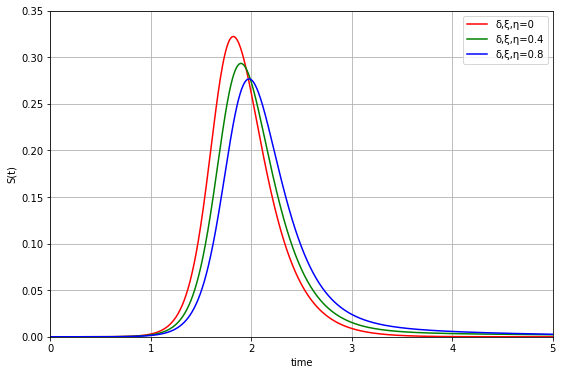

In [ ]:
x_arr = [0, 0.4, 0.8]


S_table = []
for delta in x_arr:
    ret = odeint(deriv, y0, t, args=(
        lamb, beta, delta, delta, delta, alpha, k))
    S, I, H, R = ret.T
    S_table.append(S)


plt.figure(figsize=[9, 6])
plt.plot(t, S_table[0], c='r', linestyle='-', label='δ,ξ,η=0')
plt.plot(t, S_table[1], c='g', linestyle='-', label='δ,ξ,η=0.4')
plt.plot(t, S_table[2], c='b', linestyle='-', label='δ,ξ,η=0.8')

plt.ylabel('S(t)')
plt.xlabel('time')
plt.legend(loc='upper right')
plt.xlim(0, max(t))
plt.ylim(0, .35)
plt.grid()
plt.show()


# Density of hibernators change with the spontaneous remembering rate ξ over time.

In [ ]:
lamb = 0.8
beta = 0.2
alpha = 0.5
delta = 0.5
eta = 0.5

epsilon = 0


k = 10

N = 1000000

# initial conditions: one infected, rest susceptible
S0, I0, H0, R0 = 1/N, (N - 1)/N, 0, 0


In [ ]:
t = np.linspace(0, 18, 1000)  # Grid of time points (in days)
y0 = S0, I0, H0, R0  # Initial conditions vector


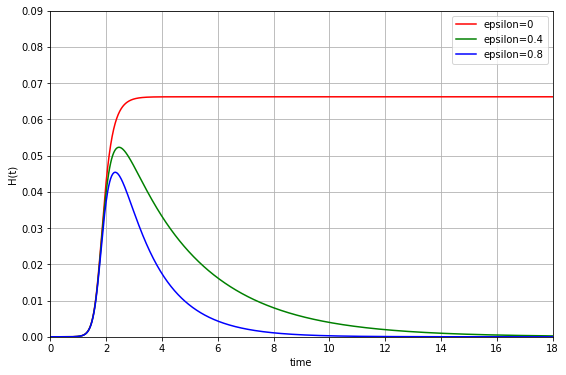

In [ ]:
epsilon_arr = [0, 0.4, 0.8]

R_table = []
H_table = []
for epsilon in epsilon_arr:
    ret = odeint(deriv, y0, t, args=(
        lamb, beta, delta, epsilon, eta, alpha, k))
    S, I, H, R = ret.T
    H_table.append(H)
    R_table.append(R)


plt.figure(figsize=[9, 6])
plt.plot(t, H_table[0], c='r', linestyle='-', label='epsilon=0')
plt.plot(t, H_table[1], c='g', linestyle='-', label='epsilon=0.4')
plt.plot(t, H_table[2], c='b', linestyle='-', label='epsilon=0.8')

plt.ylabel('H(t)')
plt.xlabel('time')
plt.legend(loc='upper right')
plt.xlim(0, max(t))
plt.ylim(0, 0.09)
plt.grid()
plt.show()


# Density of stiflers change with the spontaneous remembering rate ξ over time.

In [ ]:
lamb = 0.8
beta = 0.2
alpha = 0.5
delta = 0.5
eta = 0.5

epsilon = 0


k = 10

N = 1000000

# initial conditions: one infected, rest susceptible
S0, I0, H0, R0 = 1/N, (N - 1)/N, 0, 0


In [ ]:
t = np.linspace(0, 15, 1000)  # Grid of time points (in days)
y0 = S0, I0, H0, R0  # Initial conditions vector


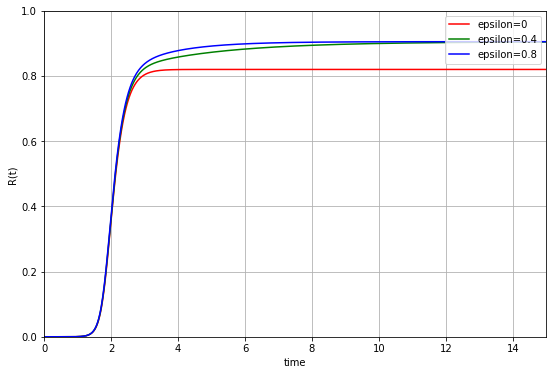

In [ ]:
epsilon_arr = [0, 0.4, 0.8]

M_table = []

for epsilon in epsilon_arr:
    ret = odeint(deriv, y0, t, args=(
        lamb, beta, delta, epsilon, eta, alpha, k))
    S, I, H, R = ret.T
    M_table.append(R)


plt.figure(figsize=[9, 6])
plt.plot(t, M_table[0], c='r', linestyle='-', label='epsilon=0')
plt.plot(t, M_table[1], c='g', linestyle='-', label='epsilon=0.4')
plt.plot(t, M_table[2], c='b', linestyle='-', label='epsilon=0.8')

plt.ylabel('R(t)')
plt.xlabel('time')
plt.legend(loc='upper right')
plt.xlim(0, max(t))
plt.ylim(0, 1)
plt.grid()
plt.show()
